# Tugas Praktikum #2

Meyta Rizki Khairunisa

24060122130085

Lab C1 Machine Learning

##  1. Lakukanlah clustering menggunakan dataset iris dengan fitur 2 dan 3!

# Import Library

In [3]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Import Data

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length','petal-width', 'class']
data = pd.read_csv(url, names=names)

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None)

In [5]:
data.head(200)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Pemilihan fitur dan visualisasi awal

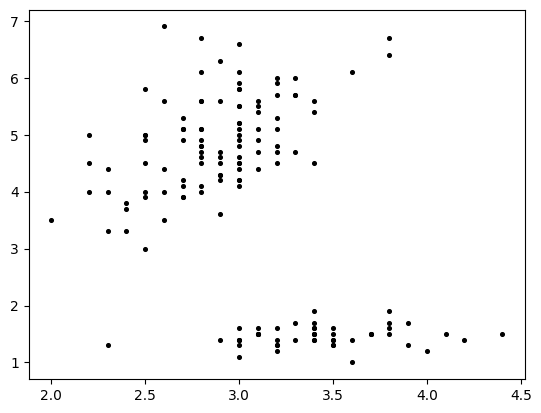

In [6]:
#Plot dataset
f1 = data[1].values
f2 = data[2].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

Pada keterangan diatas, pembentukan plot dataset fokus pada fitur 2 dan 3 atau kolom ke-1 dan ke-2 yan menyatakan petal-width dan petal length dari data iris. Kemudian data divisualisasikan berwarna hitam.

# Menghitung centroid

In [7]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
#Fitting input data
kmeans = kmeans.fit(X)
#Mendapatkan cluster labels
labels = kmeans.predict(X)
#mendapat nilai centroid
C = kmeans.cluster_centers_
#mencetak nilai centroid
print(C)

[[3.418      1.464     ]
 [2.75396825 4.4       ]
 [3.07297297 5.76756757]]


Awalnya dilakukan prediksi jumlah cluster yang akan dibagi pada data, kemudian terbagilah cluster menjadi 3 bagian. Setlah menemukan jumlah cluster kemudian pada setiap cluster mencari nilai cantroid atau nilai pusat berdasarkan posisi masing-masing cluster.

# VISUALIASASI PLOT HASIL CLUSTERING

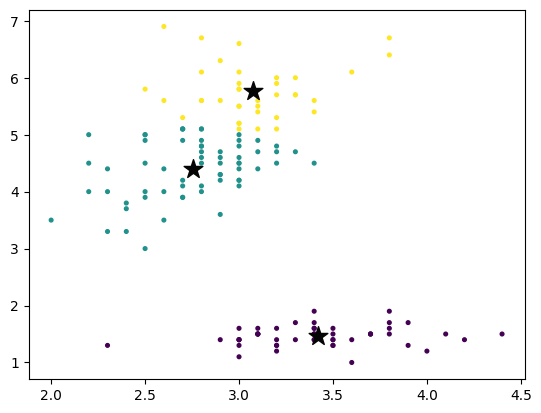

In [8]:
plt.scatter(X[:, 0], X[:, 1], s = 7, c=labels)
plt.scatter(C[:, 0], C[:, 1], marker = '*', s = 200, c='#050505')

## 2. Lakukan evaluasi hasil clustering menggunakan inertia dan silhouette coefficient

EVALUASI HASIL CLUSTERING MENGGUNAKAN INERTIA DAN SILHOUETTE COEFFICIENT

In [9]:
for k in range (1, 10):
  #Menentukan jumlah cluster
  kmeans = KMeans(n_clusters = k, random_state=1)
  #Fitting input data
  kmeans = kmeans.fit(X)
  #Mendapatkan cluster labels
  labels = kmeans.predict(X)
  #Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya(SSE)
  interia = kmeans.inertia_
  print ("k:", k, " cost:", interia)
  print ("")

k: 1  cost: 491.8763333333335

k: 2  cost: 86.35692216280445

k: 3  cost: 40.80747409220729

k: 4  cost: 27.64442222222223

k: 5  cost: 23.723726910299003

k: 6  cost: 22.29604761904762

k: 7  cost: 19.385398268398276

k: 8  cost: 16.83091463414634

k: 9  cost: 15.980212879760375



Inertia (SSE) merupakan metrik yang yang mengukur jumlah total jarak kuadrat antara setiap titik data dan centroid cluster terdekatnya.

Ketika k meningkat, nilai inertia akan menurun karena cluster menjadi lebih kecil dan spesifik dan titik data lebih dekat ke centroid masing-masing. Titik optimal mungkin pada k=3 karena penurunan inertia mulai melambat setelahnya.


EVALUASI MENGGUNAKAN SILHOUETTE COEFFICIENT

In [10]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.3433207235690285

Silhouette Score memberikan metrik tambahan untuk mengevaluasi kualitas clustering dan memastikan bahwa jumlah cluster memberikan pemisahan yang baik antar cluster. Semakin tinggi silhouette score, semakin baik clustering yang dilakukan. Nilai optimal biasanya berada di sekitar 0.5 hingga 1. Namun karena diatas menunjukan angka 0.3, maka silhouette score tergolong rendah dan tidak optimal

## 3. Tentukan jumlah K dengan elbow method

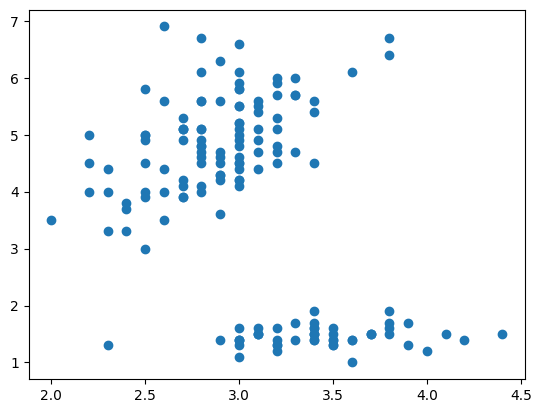

In [11]:
# membuat data set
from sklearn.datasets import load_iris
iris = load_iris()
features=iris.data.T
#mengambil data dari fitur data iris.
plt.plot()
plt.scatter(features[1], features[2]) #2 fitur yang akan dipakai
plt.show()

In [15]:
X = np.array(list(zip(features[1], features[2]))).reshape(len(features[2]), 2)
SSE = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    SSE.append(kmeanModel.inertia_)

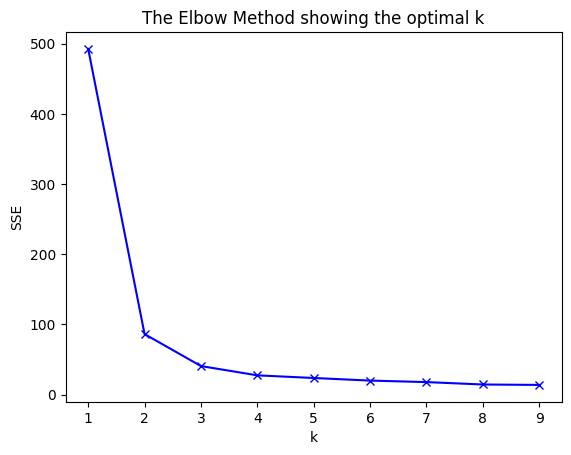

In [16]:
# Plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Berdasarkan grafik elbow point diatas, kurva mulai membengkok pada k=3, maka dari itu dapat disimpulkan bahwa k optimal menggunakan elbow point adalah 3.

## 4. Plot hasil cluster dengan nilai K yang anda pilih dengan scatterplot

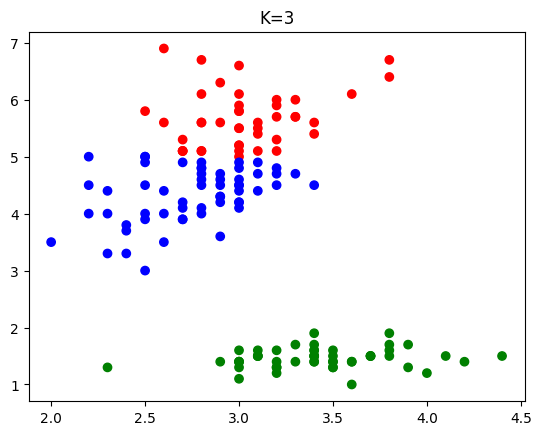

In [17]:
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.plot
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features[1], features[2], c=label_color)
plt.title("K=3")
plt.show()

Hasil scatterplot menunjukkan hasil clustering menggunakan algoritma K-Means dengan jumlah cluster k=3 pada dataset Iris. Berdasarkan gambar maka dapat disimpulkan scatterplot berhasil memperlihatkan algoritma K-Means dapat memisah dataset iris fitur 2 dan 3 ke dalam 3 cluster

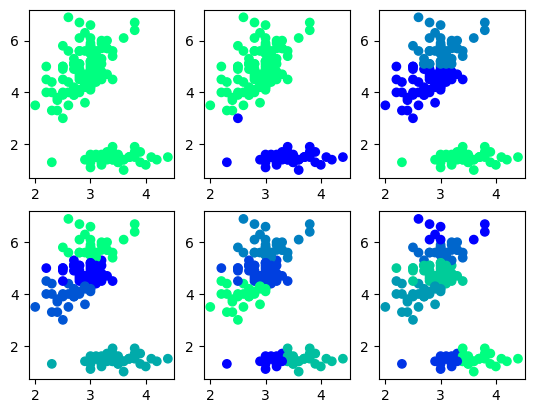

In [18]:
figure, ax=plt.subplots(2,3)
K=range(1,7)
for k in K:
    if(k<4):
        row=0
        column=k-1
    else:
        row=1
        column=k-4
    kmeanModel = KMeans(n_clusters=k).fit(X)
    y_pred = kmeanModel.fit_predict(X)
    ax[row][column].scatter(features[1], features[2], c=y_pred, cmap='winter_r')
plt.show()

Grafik diatas merupakan kumpulan scatterplots yang menunjukkan clustering menggunakan K-Means dengan jumlah k cluster yang berbeda, yaitu dari k=1 sampai k=6. Cara diatas digunakan untuk memvisualisasikan bagaimana performa clustering khususnya pada jumlah cluster yang mempengaruhi data. Berdasarkan grafik scatterplot diatas, maka dapat dilihat jumlah cluster yang paling optimal adalah k=3.